In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
hosp = pd.read_csv("../data/input/Hospital_Readmissions_Reduction_Program.csv")
hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19674 entries, 0 to 19673
Data columns (total 12 columns):
Hospital Name                 19674 non-null object
Provider ID                   19674 non-null int64
State                         19674 non-null object
Measure Name                  19674 non-null object
Number of Discharges          19674 non-null object
Footnote                      8157 non-null object
Excess Readmission Ratio      19674 non-null object
Predicted Readmission Rate    19674 non-null object
Expected Readmission Rate     19674 non-null object
Number of Readmissions        19674 non-null object
Start Date                    19674 non-null object
End Date                      19674 non-null object
dtypes: int64(1), object(11)
memory usage: 1.8+ MB


In [31]:
hosp.head()

,Hospital Name,Provider ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_AMI_HRRP,Not Available,1 - The number of cases/patients is too few to...,Not Available,Not Available,Not Available,Not Available,07/01/2014,06/30/2017
1,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_CABG_HRRP,Not Available,1 - The number of cases/patients is too few to...,Not Available,Not Available,Not Available,Not Available,07/01/2014,06/30/2017
2,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_COPD_HRRP,217,NaN,1.0195,20.9722,20.5712,47,07/01/2014,06/30/2017
3,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_HF_HRRP,259,NaN,1.0773,23.9788,22.2578,67,07/01/2014,06/30/2017
4,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_HIP_KNEE_HRRP,Not Available,1 - The number of cases/patients is too few to...,Not Available,Not Available,Not Available,Not Available,07/01/2014,06/30/2017


In [32]:
hosp['Excess Readmission Ratio'] = pd.to_numeric(hosp['Excess Readmission Ratio'],errors='coerce')
hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19674 entries, 0 to 19673
Data columns (total 12 columns):
Hospital Name                 19674 non-null object
Provider ID                   19674 non-null int64
State                         19674 non-null object
Measure Name                  19674 non-null object
Number of Discharges          19674 non-null object
Footnote                      8157 non-null object
Excess Readmission Ratio      14280 non-null float64
Predicted Readmission Rate    19674 non-null object
Expected Readmission Rate     19674 non-null object
Number of Readmissions        19674 non-null object
Start Date                    19674 non-null object
End Date                      19674 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 1.8+ MB


In [33]:
hosp.head()

,Hospital Name,Provider ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_AMI_HRRP,Not Available,1 - The number of cases/patients is too few to...,NaN,Not Available,Not Available,Not Available,07/01/2014,06/30/2017
1,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_CABG_HRRP,Not Available,1 - The number of cases/patients is too few to...,NaN,Not Available,Not Available,Not Available,07/01/2014,06/30/2017
2,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_COPD_HRRP,217,NaN,1.0195,20.9722,20.5712,47,07/01/2014,06/30/2017
3,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_HF_HRRP,259,NaN,1.0773,23.9788,22.2578,67,07/01/2014,06/30/2017
4,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_HIP_KNEE_HRRP,Not Available,1 - The number of cases/patients is too few to...,NaN,Not Available,Not Available,Not Available,07/01/2014,06/30/2017


In [34]:
hosp.shape

(19674, 12)

In [35]:
hosp2 = hosp[pd.notnull(hosp['Excess Readmission Ratio'])]
hosp2.shape

(14280, 12)

In [36]:
hosp2.head()

,Hospital Name,Provider ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
2,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_COPD_HRRP,217,NaN,1.0195,20.9722,20.5712,47,07/01/2014,06/30/2017
3,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_HF_HRRP,259,NaN,1.0773,23.9788,22.2578,67,07/01/2014,06/30/2017
5,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_PN_HRRP,213,NaN,1.1031,19.2445,17.4459,47,07/01/2014,06/30/2017
8,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,READM_30_COPD_HRRP,Not Available,5 - Results are not available for this reporti...,1.0024,18.0061,17.9630,Not Available,07/01/2014,06/30/2017
9,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,READM_30_HF_HRRP,75,NaN,0.9726,19.6816,20.2355,13,07/01/2014,06/30/2017


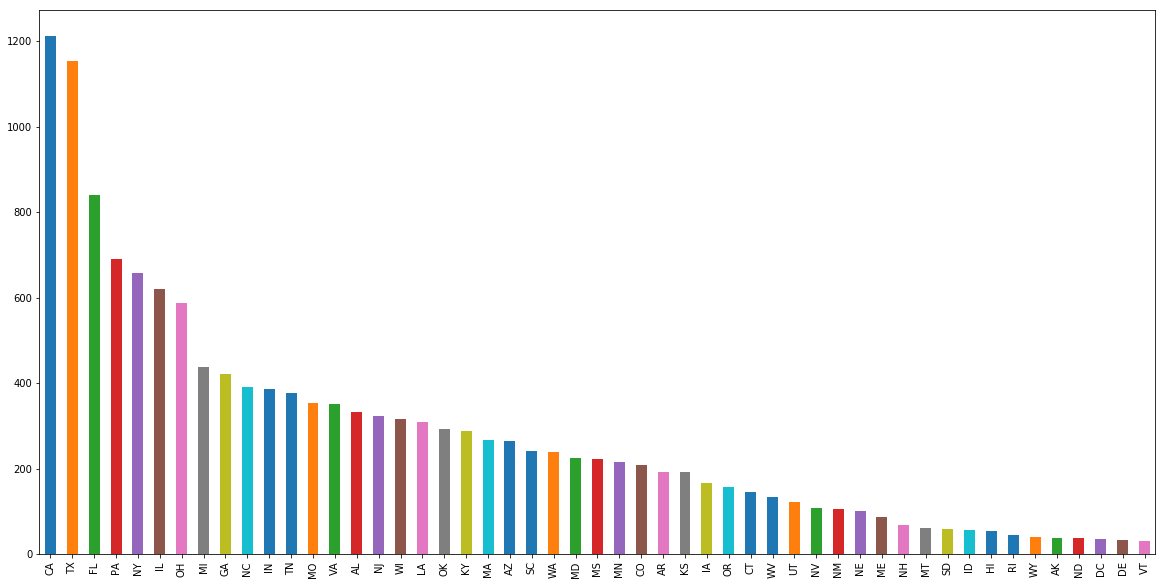

In [37]:
hosp2["State"].value_counts().plot(kind="bar", figsize=(20,10))

In [38]:
grouped = hosp2.groupby("State")
grouped.head()

,Hospital Name,Provider ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
2,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_COPD_HRRP,217,NaN,1.0195,20.9722,20.5712,47,07/01/2014,06/30/2017
3,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_HF_HRRP,259,NaN,1.0773,23.9788,22.2578,67,07/01/2014,06/30/2017
5,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_PN_HRRP,213,NaN,1.1031,19.2445,17.4459,47,07/01/2014,06/30/2017
8,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,READM_30_COPD_HRRP,Not Available,5 - Results are not available for this reporti...,1.0024,18.0061,17.9630,Not Available,07/01/2014,06/30/2017
9,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,READM_30_HF_HRRP,75,NaN,0.9726,19.6816,20.2355,13,07/01/2014,06/30/2017
10,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,READM_30_HIP_KNEE_HRRP,Not Available,5 - Results are not available for this reporti...,0.9761,4.4642,4.5734,Not Available,07/01/2014,06/30/2017
11,GRAND ITASCA CLINIC AND HOSPITAL,240064,MN,READM_30_PN_HRRP,153,NaN,0.9719,14.1502,14.5594,20,07/01/2014,06/30/2017
18,CHESHIRE MEDICAL CENTER,300019,NH,READM_30_AMI_HRRP,Not Available,5 - Results are not available for this reporti...,1.0101,19.0025,18.8128,Not Available,07/01/2014,06/30/2017
20,CHESHIRE MEDICAL CENTER,300019,NH,READM_30_COPD_HRRP,196,NaN,0.9820,18.5452,18.8845,35,07/01/2014,06/30/2017
21,CHESHIRE MEDICAL CENTER,300019,NH,READM_30_HF_HRRP,303,NaN,0.9514,19.8545,20.8696,57,07/01/2014,06/30/2017


In [39]:
#hosp2.plot(kind="bar", x='State',y='Excess Readmission Ratio',  figsize=(20,10))

In [40]:
hosp3 = hosp2[["State", "Excess Readmission Ratio"]]
hosp3.head()

,State,Excess Readmission Ratio
2,LA,1.0195
3,LA,1.0773
5,LA,1.1031
8,MN,1.0024
9,MN,0.9726


In [41]:
hosp4 = hosp3.groupby('State').mean()
hosp4.head()

,Excess Readmission Ratio
State,
AK,0.956058
AL,1.018150
AR,1.023103
AZ,0.983623
CA,1.003880


In [42]:
hosp4.to_csv("../data/output/AverageReadmissionRatioByState.csv")

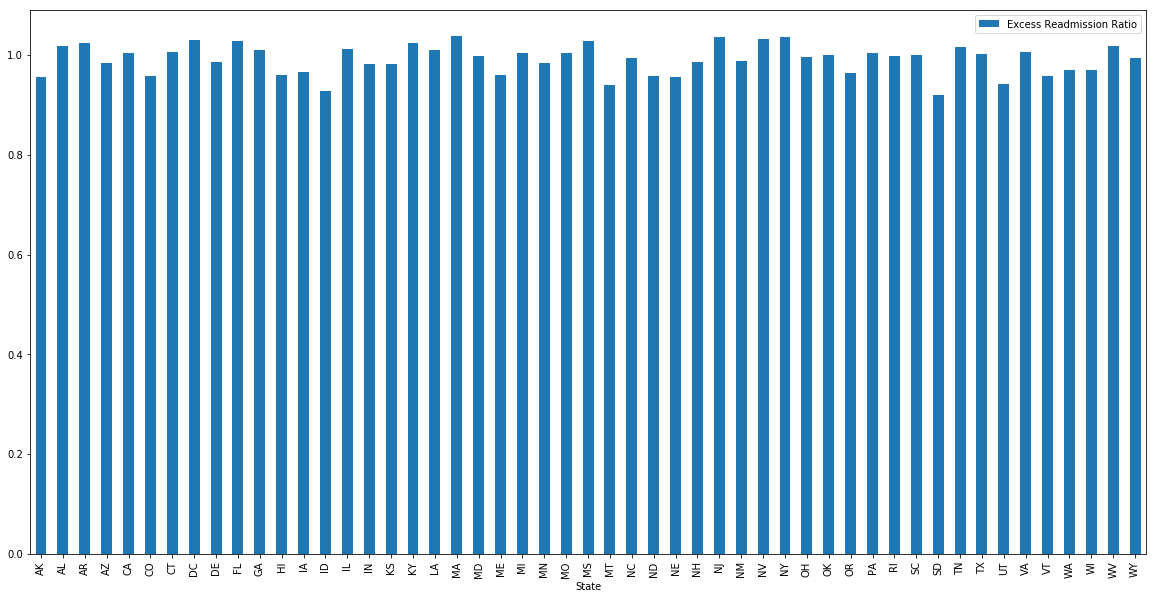

In [43]:
hosp4.plot(kind="bar", figsize=(20,10))